In [57]:
require(ggplot2)
require(GGally)
require(reshape2)
require(lme4)
require(compiler)
require(parallel)
require(boot)
require(lattice)
library(plm)
library(pglm)
library(lme4)

In [4]:
library(plm)       
library(stargazer)
library(gplots)    # Various programing tools for plotting data
library(tseries)   # For timeseries analysis
library(lmtest)  

In [11]:
df <- read.csv('./Datasets/2021-07-22 regression_dataset_withna.csv')
dfnona <- read.csv('./Datasets/2021-07-22 regression_dataset.csv')

In [116]:
new_df2 = read.csv('./Datasets/2021-08-07 new_df2.csv')
new_df2_dropna = read.csv('./Datasets/2021-08-07 new_df2_dropna.csv')

# Modeling

Also check VIFs
Booth GD (1994) suggests that VIFs should ideally be <1.5, or <20 for interactions. Higher values would indicate multicollinearity and thus that the model is unstable.

## MODEL ONE. Predicting whether at conflict or not

### Just indices

In [221]:
model_indices <- glmer(
  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.144412 (tol = 0.002, component 1)"


In [222]:
summary(model_indices)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 |  
    countryname) + (1 | year)
   Data: new_df2

     AIC      BIC   logLik deviance df.resid 
   870.1   1026.5   -408.0    816.1     2399 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-36.258  -0.162  -0.089  -0.051  11.071 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 countryname (Intercept) 3.053e+00 1.7471642
 year        (Intercept) 7.971e-08 0.0002823
Number of obs: 2426, groups:  countryname, 54; year, 51

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.24103    2.30428  -2.274   0.0229 *  
T1                   0.73574    3.64390   0.202   0.8400    
T2                   5.5387

### Just controls

In [290]:
model_controls <- glmer(
  intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2,
    family='binomial'
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.230862 (tol = 0.002, component 1)"


In [291]:
summary(model_controls)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + (1 | countryname) +      (1 | year)
   Data: new_df2

     AIC      BIC   logLik deviance df.resid 
   553.1    623.3   -263.6    527.1     1625 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-14.5473  -0.1496  -0.0884  -0.0288  11.4799 

Random effects:
 Groups      Name        Variance  Std.Dev.
 year        (Intercept) 2.966e-05 0.005446
 countryname (Intercept) 3.224e+00 1.795479
Number of obs: 1638, groups:  year, 47; countryname, 46

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -14.00484    3.73463  -3.750 0.000177 ***
Resources             0.01313    0.01443   0.910 0.362992    
EthFrac               4

### Both

In [292]:
model_both <- glmer(
  intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1|year),
    data = new_df2,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.205645 (tol = 0.002, component 1)"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?"


In [293]:
summary(model_both)


Correlation matrix not shown by default, as p = 34 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 +  
    T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 +  
    T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) +  
    (1 | year)
   Data: new_df2

     AIC      BIC   logLik deviance df.resid 
   549.2    743.6   -238.6    477.2     1602 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-22.3863  -0.1365  -0.0684  -0.0269   6.7644 

Random effects:
 Groups      Name        Variance  Std.Dev.
 year        (Intercept) 4.916e-05 0.007011
 countryname (Intercept) 3.301e+00 1.816910
Number of obs: 1638, groups:  year, 47; countryname, 46

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Inte

### Exporting both models

F-1 Score & \multicolumn{1}{c}{0.66} & \multicolumn{1}{c}{0.65} & \multicolumn{1}{c}{0.68} \\

In [295]:
stargazer(c(model_controls, model_indices, model_both), align=TRUE, digits=2,  title=c('Control regression', 'Index regression', 'Index & Control regression'), font.size='small', no.space=TRUE, single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Aug 08, 2021 - 9:05:18 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Control regression} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{intrastate\_conflict} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 Resources & 0.01$ $(0.01) &  & 0.01$ $(0.01) \\ 
  EthFrac & 4.04^{*}$ $(2.41) &  & 4.00$ $(2.51) \\ 
  LingFrac & -2.86$ $(1.77) &  & -2.53$ $(1.87) \\ 
  RelFrac & -1.68$ $(1.65) &  & -1.72$ $(1.71) \\ 
  Transitional & 1.14$ $(0.72) &  & 1.31^{*}$ $(0.76) \\ 
  AC\_neighbour & -0.11$ $(0.33) &  & -0.32$ $(0.36) \\ 
  Population\_log & 0.88^{***}$ $(0.29) &  & 0.88^

## Model two: estimating the number of deaths

### Model one: just indices

In [60]:
new_df2$total_deaths_log = log(new_df2$total_deaths + 1)

In [66]:
colnames(new_df2)

[1] "year"                "country"             "is_war"             
 [4] "n_conflicts"         "total_deaths"        "incompatibility"    
 [7] "intensity"           "type_of_conflict"    "conflict_before"    
[10] "countryname"         "T1"                  "T2"                 
[13] "T3"                  "T4"                  "T5"                 
[16] "T6"                  "T7"                  "T8"                 
[19] "T9"                  "T10"                 "T11"                
[22] "T12"                 "T13"                 "T14"                
[25] "T15"                 "T16"                 "T17"                
[28] "T18"                 "T19"                 "T20"                
[31] "T21"                 "T22"                 "T23"                
[34] "intrastate_conflict" "interstate_conflict" "Country"            
[37] "Year"                "ForeignAid"          "Resources"          
[40] "EthFrac"             "LingFrac"            "RelFrac"            
[43] "Transitional"        "AC_neighbour"        "GDP_capita"         
[46] "Population"          "Population_log"      "GDP_capita_log"     
[49] "ForeignAid_log"      "total_deaths_log"

#### All dataset

In [73]:
model_indices_cont <- lmer(
  total_deaths_log ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2)

In [74]:
summary(model_indices_cont)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 +  
    T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 +  
    T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) +  
    (1 | year)
   Data: new_df2

REML criterion at convergence: 8716.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3096 -0.4724 -0.1013  0.3408  6.0270 

Random effects:
 Groups      Name        Variance Std.Dev.
 countryname (Intercept) 0.4203   0.6483  
 year        (Intercept) 0.2543   0.5043  
 Residual                1.9938   1.4120  
Number of obs: 2426, groups:  countryname, 54; year, 51

Fixed effects:
                      Estimate Std. Error t value
(Intercept)          0.3486991  0.6623486   0.526
T1                  -0.9476161  1.1712076  -0.809
T2                   1.0775943  1.2005363   0.898
T3                  -1.6815032  1.2739345  -1.320
T4                  -0.7654474  1.0637528  -0.720
T5        

#### Only where war happens

In [75]:
model_indices_cont_all <- lmer(
  total_deaths_log ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2[new_df2$intrastate_conflict == 1, ])

In [76]:
summary(model_indices_cont_all)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 +  
    T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 +  
    T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) +  
    (1 | year)
   Data: new_df2[new_df2$intrastate_conflict == 1, ]

REML criterion at convergence: 1567.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1817 -0.6081  0.0018  0.5626  3.5948 

Random effects:
 Groups      Name        Variance Std.Dev.
 year        (Intercept) 6.0165   2.4528  
 countryname (Intercept) 0.4453   0.6673  
 Residual                1.1812   1.0868  
Number of obs: 474, groups:  year, 50; countryname, 39

Fixed effects:
                    Estimate Std. Error t value
(Intercept)           3.6678     1.2466   2.942
T1                   -2.2394     2.0486  -1.093
T2                    3.4660     2.2596   1.534
T3                   -4.1284     2.4360  -1.695
T4                    1.3204     2.

### Model two: just controls

#### all dataset

In [77]:
model_controls_cont <- lmer(
  total_deaths_log ~  Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2)

In [78]:
summary(model_controls_cont)

Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + (1 | countryname) +      (1 | year)
   Data: new_df2

REML criterion at convergence: 5941

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4022 -0.3935 -0.0700  0.2577  6.2272 

Random effects:
 Groups      Name        Variance Std.Dev.
 year        (Intercept) 0.1950   0.4416  
 countryname (Intercept) 0.6772   0.8229  
 Residual                1.9497   1.3963  
Number of obs: 1638, groups:  year, 47; countryname, 46

Fixed effects:
                    Estimate Std. Error t value
(Intercept)         -4.64278    1.36908  -3.391
Resources            0.01512    0.00510   2.965
EthFrac              0.73700    0.89728   0.821
LingFrac            -1.51415    0.70197  -2.157
RelFrac             -1.19410    0.62598  -1.908
Transitional        -0.14523  

#### where war happens

In [79]:
model_controls_cont_all <- lmer(
  total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2[new_df2$intrastate_conflict == 1, ])

In [80]:
summary(model_controls_cont)

Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + (1 | countryname) +      (1 | year)
   Data: new_df2

REML criterion at convergence: 5941

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4022 -0.3935 -0.0700  0.2577  6.2272 

Random effects:
 Groups      Name        Variance Std.Dev.
 year        (Intercept) 0.1950   0.4416  
 countryname (Intercept) 0.6772   0.8229  
 Residual                1.9497   1.3963  
Number of obs: 1638, groups:  year, 47; countryname, 46

Fixed effects:
                    Estimate Std. Error t value
(Intercept)         -4.64278    1.36908  -3.391
Resources            0.01512    0.00510   2.965
EthFrac              0.73700    0.89728   0.821
LingFrac            -1.51415    0.70197  -2.157
RelFrac             -1.19410    0.62598  -1.908
Transitional        -0.14523  

### Both

#### all dataset

In [81]:
model_indices_control_cont_1 <- lmer(
  total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1|year),
  data = new_df2)

In [85]:
summary(model_indices_control_cont_1)


Correlation matrix not shown by default, as p = 34 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 +  
    T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 +  
    T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) +  
    (1 | year)
   Data: new_df2

REML criterion at convergence: 5803.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3844 -0.4281 -0.0733  0.2786  6.0661 

Random effects:
 Groups      Name        Variance Std.Dev.
 year        (Intercept) 0.1420   0.3768  
 countryname (Intercept) 0.5639   0.7509  
 Residual                1.8982   1.3778  
Number of obs: 1638, groups:  year, 47; countryname, 46

Fixed effects:
                     Estimate Std. Error t value
(Intercept)         -3.717405   1.555683  -2.390
Resources            0.015124   0.005052   2.994
EthFrac              0.7143

#### Only where war happens

In [82]:
model_indices_control_cont_2 <- lmer(
  total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1|year),
  data = new_df2[new_df2$intrastate_conflict == 1, ])

In [86]:
summary(model_indices_control_cont_2)


Correlation matrix not shown by default, as p = 34 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: total_deaths_log ~ Resources + EthFrac + LingFrac + RelFrac +  
    Transitional + AC_neighbour + Population_log + GDP_capita_log +  
    ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 +  
    T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 +  
    T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) +  
    (1 | year)
   Data: new_df2[new_df2$intrastate_conflict == 1, ]

REML criterion at convergence: 998.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.38006 -0.55989 -0.03947  0.49867  3.01359 

Random effects:
 Groups      Name        Variance Std.Dev.
 year        (Intercept) 4.8349   2.1988  
 countryname (Intercept) 0.2668   0.5166  
 Residual                1.3195   1.1487  
Number of obs: 303, groups:  year, 46; countryname, 31

Fixed effects:
                     Estimate Std. Error t value
(Intercept)          -6.79363    2.97176  -2.286
Resources             0.02286   

### Exporting for all countries

In [322]:
stargazer(c(model_indices_cont, model_controls_cont, model_indices_control_cont_1), align=TRUE, digits=2, font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Aug 08, 2021 - 10:24:58 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{total\_deaths\_log} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 T1 & -0.95$ $(1.17) &  & -1.02$ $(1.40) \\ 
  T2 & 1.08$ $(1.20) &  & -2.92^{**}$ $(1.49) \\ 
  T3 & -1.68$ $(1.27) &  & -2.73^{*}$ $(1.54) \\ 
  T4 & -0.77$ $(1.06) &  & -1.64$ $(1.30) \\ 
  T5 & -1.59$ $(1.51) &  & -2.79$ $(1.89) \\ 
  T6 & 8.09^{***}$ $(1.28) &  & 4.67^{***}$ $(1.56) \\ 
  T7 & -2.60$ $(1.71) &  & -6.27^{**}$ $(2.57) \\ 
  T8 & 3.32$ $(2.24) &  & 3.81$ $(2.64) \\ 
  

### Exporting only for war countries

In [ ]:
model_indices_cont_all
model_controls_cont_all
model_indices_control_cont_2

In [323]:
stargazer(c(model_indices_cont_all, model_controls_cont_all, model_indices_control_cont_2), align=TRUE, digits=2, font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Aug 08, 2021 - 10:27:08 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{total\_deaths\_log} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 T1 & -2.24$ $(2.05) &  & -4.18$ $(2.68) \\ 
  T2 & 3.47$ $(2.26) &  & -1.29$ $(3.29) \\ 
  T3 & -4.13^{*}$ $(2.44) &  & -8.57^{**}$ $(3.50) \\ 
  T4 & 1.32$ $(2.23) &  & 0.06$ $(3.24) \\ 
  T5 & -3.99$ $(2.77) &  & -10.24^{**}$ $(4.80) \\ 
  T6 & 7.11^{***}$ $(2.07) &  & 3.61$ $(3.00) \\ 
  T7 & -8.00^{**}$ $(3.60) &  & -8.26$ $(6.28) \\ 
  T8 & -5.42$ $(4.62) &  & -6.82$ $(6.56) \\ 
  

## Model 3: predicting incompatibility

In [111]:
new_df2$is_war = new_df2$conflict_type == 'War'

In [329]:
model_incompatibility <- glmer(
  is_war ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"


In [326]:
model_incompatibility_all <- glmer(
  is_war ~  Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"


In [327]:
model_incompatibility_controls <-  glmer(
  is_war ~  Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2,
    family='binomial'
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"


In [331]:
stargazer(c(model_incompatibility, model_incompatibility_controls, model_incompatibility_all), align=TRUE, digits=2, font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Aug 08, 2021 - 10:59:56 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{is\_war} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 T1 & -2.79$ $(4.37) &  & -4.61$ $(5.55) \\ 
  T2 & -3.99$ $(5.09) &  & -24.38^{***}$ $(7.44) \\ 
  T3 & -6.87$ $(5.28) &  & -11.34$ $(6.99) \\ 
  T4 & -5.86$ $(4.48) &  & -1.91$ $(6.29) \\ 
  T5 & 10.46^{*}$ $(5.51) &  & -0.47$ $(8.38) \\ 
  T6 & 18.01^{***}$ $(4.80) &  & 14.90^{**}$ $(6.52) \\ 
  T7 & -20.19^{**}$ $(8.74) &  & -19.99$ $(12.39) \\ 
  T8 & -0.97$ $(10.14) &  & -6.59$ $(14.47) \\ 
 

In [325]:
summary(model_incompatibility)

Warning message in vcov.merMod(object, use.hessian = use.hessian):
"variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX"
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
"variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX"

Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 |  
    countryname) + (1 | year) + (1 | person)
   Data: new_df2

     AIC      BIC   logLik deviance df.resid 
   752.7    915.0   -348.4    696.7     2398 

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-406.6    0.0    0.0    0.0 4009.9 

Random effects:
 Groups      Name        Variance Std.Dev.
 person      (Intercept) 66.1078  8.1307  
 countryname (Intercept)  1.9859  1.4092  
 year        (Intercept)  0.0314  0.1772  
Number of obs: 2426, groups:  person, 1326; countryname, 54; year, 51

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)            5.683      6.933   0.820  0.41238    
T1                   -34.928    

In [ ]:
stargazer()

## Model 4: leaders as random-effects

In [119]:
model_people <- glmer(
  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year) + (1|person),
  data = new_df2,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 3 negative eigenvalues"


In [121]:
summary(model_people)

Warning message in vcov.merMod(object, use.hessian = use.hessian):
"variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX"
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
"variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX"

Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 |  
    countryname) + (1 | year) + (1 | person)
   Data: new_df2

     AIC      BIC   logLik deviance df.resid 
   752.7    915.0   -348.4    696.7     2398 

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-406.6    0.0    0.0    0.0 4009.9 

Random effects:
 Groups      Name        Variance Std.Dev.
 person      (Intercept) 66.1078  8.1307  
 countryname (Intercept)  1.9859  1.4092  
 year        (Intercept)  0.0314  0.1772  
Number of obs: 2426, groups:  person, 1326; countryname, 54; year, 51

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)            5.683      6.933   0.820  0.41238    
T1                   -34.928    

# Performing diagnostics

## Hausman test

The null hypothesis is that the preferred model is random effects <-- I need random effects

In [122]:
phtest(intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23,
      data = new_df2)


	Hausman Test

data:  intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac +  ...
chisq = 23.039, df = 33, p-value = 0.9019
alternative hypothesis: one model is inconsistent


## Other diagnostics

In [306]:
library(lmtest)

In [308]:
# Serial correlation
pbgtest(model_indices)

ERROR: Error in UseMethod("pbgtest"): no applicable method for 'pbgtest' applied to an object of class "c('glmerMod', 'merMod')"


In [298]:
model_both2 <- glmer(
  intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1|year),
    data = new_df2_dropna,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.205645 (tol = 0.002, component 1)"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?"


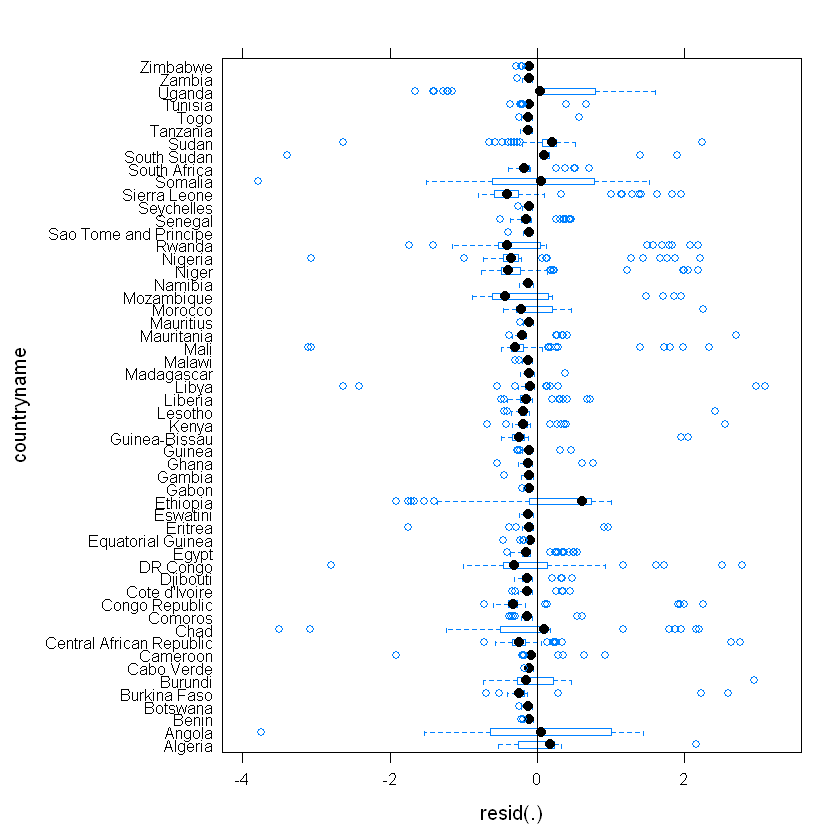

In [309]:
plot(model_indices, countryname ~ resid(.), abline=0)


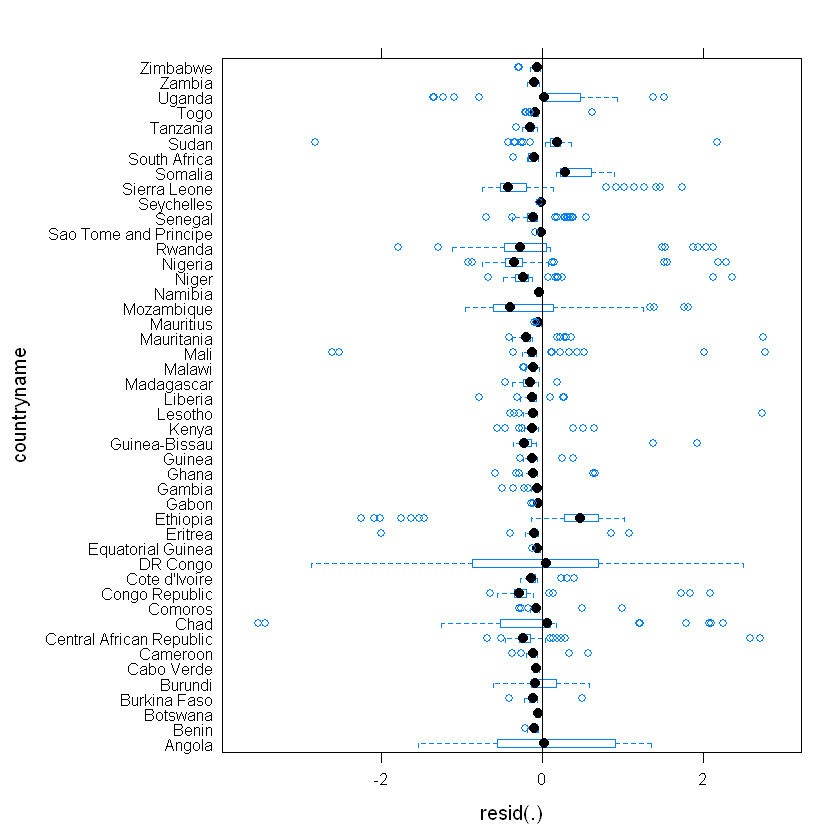

In [304]:
plot(model_both2, countryname ~ resid(.), abline=0)

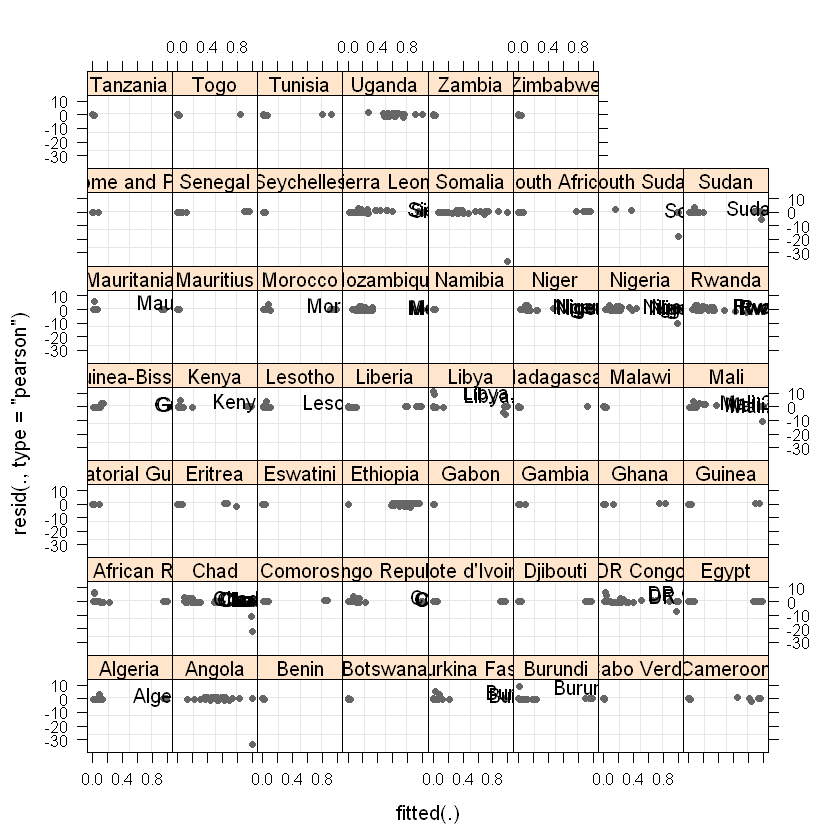

In [310]:
plot(model_indices, resid(., type='pearson') ~ fitted(.) | countryname, id=0.05, adj=-0.3, pch=20, col='gray40')

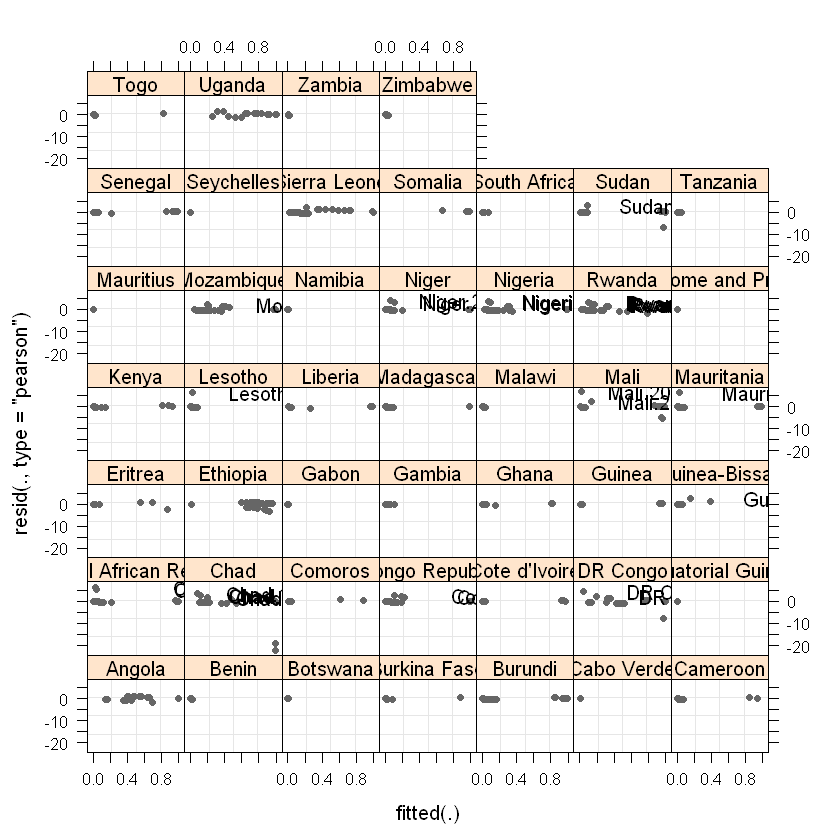

In [311]:
plot(model_both2, resid(., type='pearson') ~ fitted(.) | countryname, id=0.05, adj=-0.3, pch=20, col='gray40')

### Checking for heteroskedasticity

In [170]:
bptest(intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = new_df2, family='binomial')

ERROR: Error in bptest(intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + : unused argument (family = "binomial")


In [169]:
bptest(intrastate_conflict ~  T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23,
      data = new_df2)


	studentized Breusch-Pagan test

data:  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +     T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +     T19 + T20 + T21 + T22 + T23
BP = 147.07, df = 23, p-value < 2.2e-16


In [166]:
bptest(intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23,
      data = new_df2_dropna)


	studentized Breusch-Pagan test

data:  intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac +     Transitional + AC_neighbour + Population_log + GDP_capita_log +     ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 +     T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 +     T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23
BP = 163.72, df = 33, p-value < 2.2e-16


Variance is distributed unevenly, so we cannot just continue. Thus, I normalize all the coefficients

Parameter estimation -> not good in this case, so I resort to a prediction task.

### Changing the index

### Importing Quantile Dataset

In [200]:
quant_df <- read.csv("./Datasets/2021-08-07 new_df_quant2.csv", header=TRUE)

In [206]:
bptest(intrastate_conflict ~  T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23,
      data = quant_df, studentize=F)


	Breusch-Pagan test

data:  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +     T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +     T19 + T20 + T21 + T22 + T23
BP = 185.74, df = 23, p-value < 2.2e-16


In [317]:
model_indices_quantile <- glmer(
  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = quant_df,
    family='binomial'
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"


In [319]:
model_all_quantile <- glmer(
  intrastate_conflict ~  Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + interstate_conflict + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 | countryname) + (1|year),
  data = quant_df,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.26407 (tol = 0.002, component 1)"


In [321]:
stargazer(c(model_indices_quantile, model_all_quantile), align=TRUE, digits=2, font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Aug 08, 2021 - 10:13:06 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{intrastate\_conflict} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)}\\ 
\hline \\[-1.8ex] 
 Resources &  & 0.01$ $(0.01) \\ 
  EthFrac &  & 4.06^{*}$ $(2.43) \\ 
  LingFrac &  & -2.59$ $(1.80) \\ 
  RelFrac &  & -1.96$ $(1.67) \\ 
  Transitional &  & 0.95$ $(0.78) \\ 
  AC\_neighbour &  & -0.23$ $(0.36) \\ 
  Population\_log &  & 0.90^{***}$ $(0.31) \\ 
  GDP\_capita\_log &  & -0.32$ $(0.27) \\ 
  ForeignAid\_log &  & 0.21$ $(0.21) \\ 
  T1 & -0.14$ $(0.13) & -0.49^{***}$ $(0.18) \\ 
  T2 & 0.13$ $(0.13) & -0.29

In [ ]:
summary(model_all_quantile)

In [191]:
summary(model_indices_quantile)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + interstate_conflict + (1 |  
    countryname) + (1 | year)
   Data: quant_df

     AIC      BIC   logLik deviance df.resid 
   877.6   1034.1   -411.8    823.6     2399 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-34.080  -0.159  -0.090  -0.051  12.777 

Random effects:
 Groups      Name        Variance  Std.Dev.
 countryname (Intercept) 3.0200153 1.7378  
 year        (Intercept) 0.0009059 0.0301  
Number of obs: 2426, groups:  countryname, 54; year, 51

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -4.001515   0.319940 -12.507  < 2e-16 ***
T1                  -0.142737   0.133863  -1.066  0.28629    
T2                   0.127

Conclusion: the model has heteroskedastic errors (!)

### Look at predicted vs plotted values

If random effect are not significant, use the usual logistic regression. My random effects are significant, hence, I use them.

In [312]:
new_df2$Predicted <- predict(model_indices, new_df2)


Check if the model still performs poorly even after quantile transformations

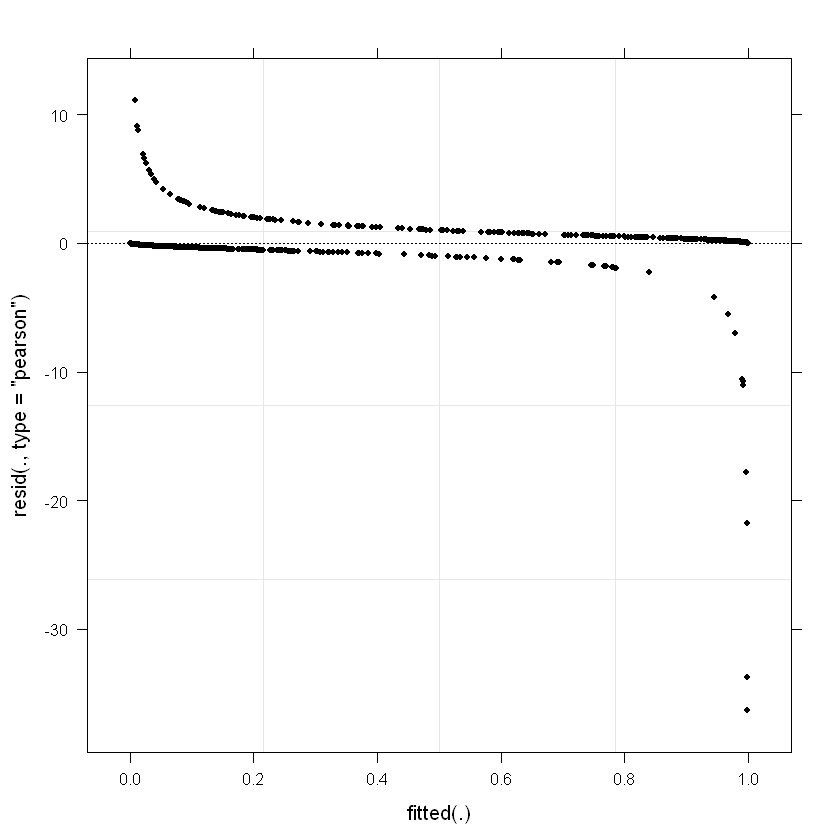

In [313]:
par(mfrow = c(2, 2))           # display plots in 2 rows and 2 columns
plot(model_indices, pch = 20, col = "black", lty = "dotted"); par(mfrow = c(1, 1))

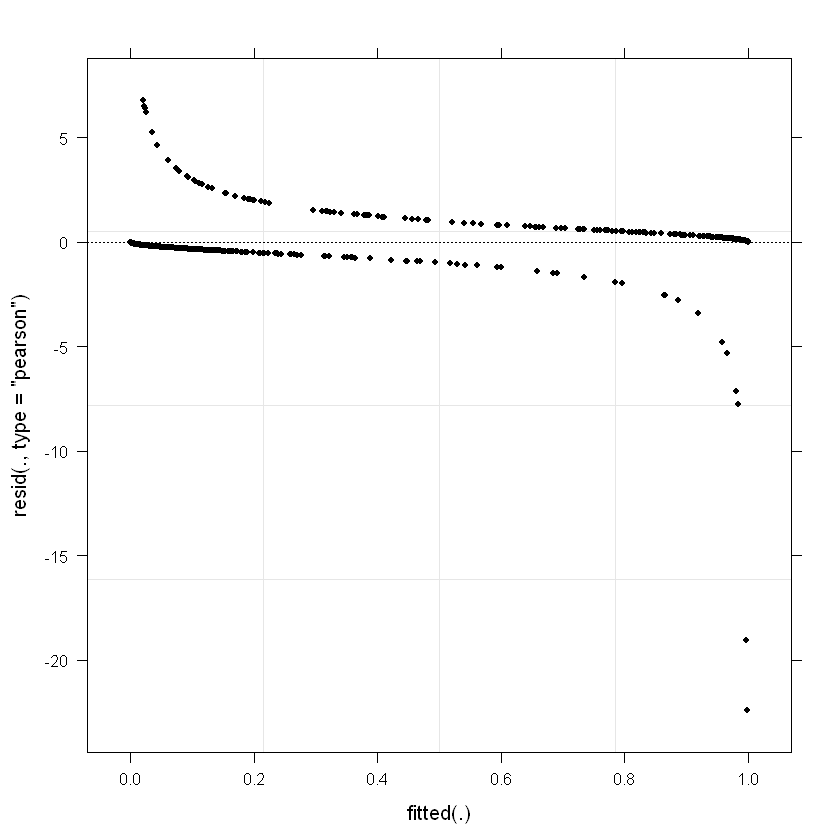

In [314]:
par(mfrow = c(2, 2))           # display plots in 2 rows and 2 columns
plot(model_both2, pch = 20, col = "black", lty = "dotted"); par(mfrow = c(1, 1))

The article firstly describes plotting Pearson residual against predictors. Such plots are helpful in identifying non-linearity and provide hints on how to transform predictors. Next, I focus on observations of outlier, leverage and influence that may have significant impact on model building. Outlier is such an observation that its response value is unusual conditional on covariate pattern. Leverage is an observation with covariate pattern that is far away from the regressor space. Influence is the product of outlier and leverage. That is, when influential observation is dropped from the model, there will be a significant shift of the coefficient. Summary statistics for outlier, leverage and influence are studentized residuals, hat values and Cook’s distance. They can be easily visualized with graphs and formally tested using the car package.

In [268]:
install.packages('foreign')

Warning message:
"package 'foreign' is not available (for R version 3.6.3)"


In [262]:
residualPlots(model_indices)

ERROR: Error in residualPlots(model_indices): could not find function "residualPlots"


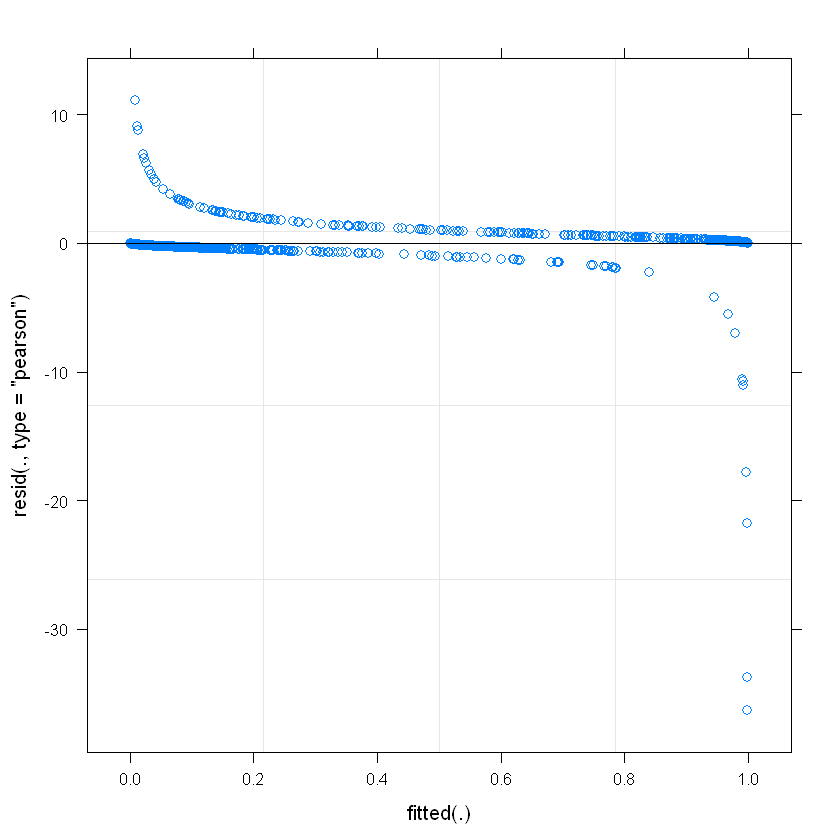

In [270]:
plot(model_indices)

In [273]:
install.packages('ggfortify')

also installing the dependency 'gridExtra'





  There is a binary version available but the source version is later:
          binary source needs_compilation
ggfortify 0.4.11 0.4.12             FALSE

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paulius\AppData\Local\Temp\RtmpgfFe9f\downloaded_packages


installing the source package 'ggfortify'




In [336]:
pdf(file = "C:/Users/Paulius/OneDrive/Oxford University/Courses/Trinity/Thesis/Data/Figures/rresids.pdf",   # The directory you want to save the file in
    width = 4, # The width of the plot in inches
    height = 4) # The height of the plot in inches

answer7(model_indices, 'black')

# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

In [315]:
answer7 <- function(my_lm, color_str){
    resids <- residuals(my_lm)
    fitted <- fitted(my_lm)

   p_vs_r <- ggplot(data = NULL, aes(x = fitted, y = resids))+
        geom_point(colour = color_str)

   qq_r <- ggplot(data = NULL, aes(sample = resids))+
        stat_qq(colour = color_str)

   plot(p_vs_r)
   plot(qq_r)

}

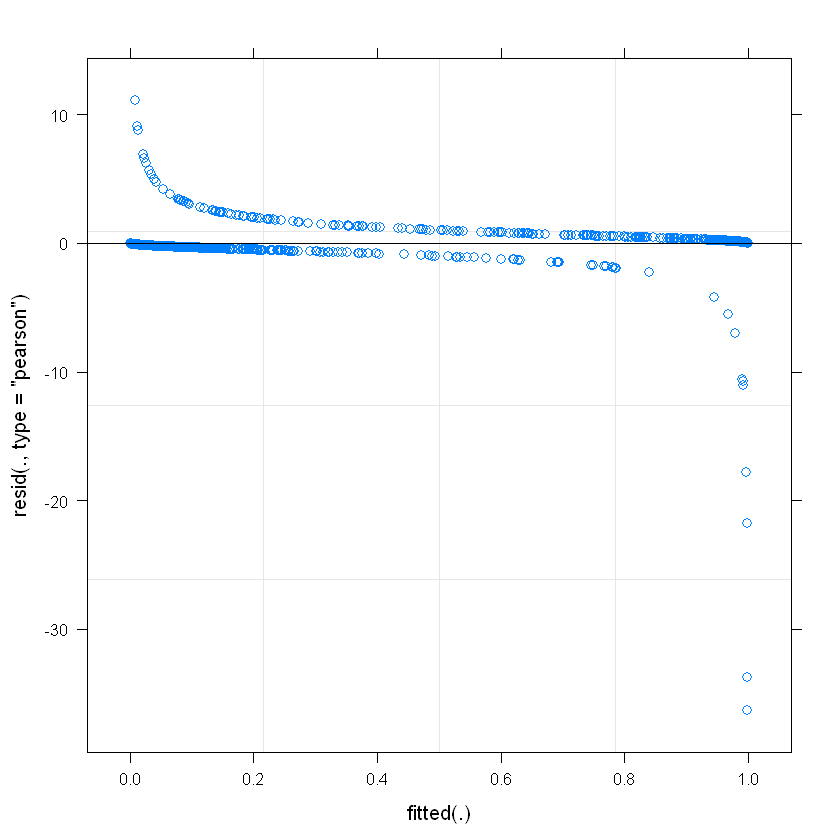

In [288]:
plot(model_indices, which=10); par(mfrow=c(1,1))

In [289]:
autoplot(model_indices) + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  theme_bw()

ERROR: Error: Objects of type glmerMod not supported by autoplot.


## Linearity

# ARCHIVE ---- (Everything is before 2021-08-07)

# Testing out models - Model PGLM

## Model 1: estimating the effect of controls - random binomial

In [51]:
model_gls_ind <- glmer(
intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + (1|countryname) + (1|year),
    data=indices_df,
    family='binomial'
)

In [83]:
summary(model)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 5 iterations
Return code 8: successive function values within relative tolerance limit (reltol)
Log-Likelihood: -525.9933 
7  free parameters
Estimates:
              Estimate Std. error t value  Pr(> t)    
(Intercept) -1.9642050  0.4205265  -4.671 3.00e-06 ***
GDP_capita  -0.0005368  0.0001371  -3.915 9.03e-05 ***
EthFrac      2.4201511  0.9608493   2.519   0.0118 *  
LingFrac    -0.2719482  0.6731916  -0.404   0.6862    
RelFrac     -0.8373900  0.5419935  -1.545   0.1223    
Foreword    11.6045382  6.9311843   1.674   0.0941 .  
sigma        2.5247164  0.1999305  12.628  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
--------------------------------------------

## Model 2: Estimating the effects of  random binomial

In [25]:
library(plm)
library(lme4)
library(sjPlot)
library(parameters)
library(lfe)

In [26]:
indices_df = read.csv('./Datasets/2021-07-24 indices_reg.csv') # All indices and all years, response: intra_state and inter_state (~2.4K)
fulreg_df = read.csv('./Datasets/2021-07-30 ful_reg.csv') # indices and years, only the ones available (~1.6K)

In [29]:
model_gls_3 <- glmer(
  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1|year),
  data = indices_df,
    family='binomial'
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0674909 (tol = 0.002, component 1)"


In [18]:
summary(model_gls_3)


Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + (1 | countryname) + (1 | year)
   Data: indices_df

     AIC      BIC   logLik deviance df.resid 
  1665.4   1816.0   -806.7   1613.4     2400 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1761 -0.3478 -0.1466 -0.0690  6.8127 

Random effects:
 Groups      Name        Variance Std.Dev.
 countryname (Intercept) 5.1163   2.2619  
 year        (Intercept) 0.2259   0.4752  
Number of obs: 2426, groups:  countryname, 54; year, 51

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.3269     1.4887  -0.891 0.372765    
T1           -6.0813     2.6029  -2.336 0.019475 *  
T2           -1.4660     2.7097  -0.541 0.588484    
T3           -0.3206     2.84

In [ ]:
write.csv(data.frame(predict(model_gls_3, newdata=indices_df, type='response')), './Datasets/2021-07-30 predictions.csv')

In [8]:
model_gls_ind <- glmer(
intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + (1|countryname) + (1|year),
    data=fulreg_df,
    family='binomial'
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.103956 (tol = 0.002, component 1)"


In [9]:
model_gls_ind_only <- glmer(
intrastate_conflict ~  T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1|countryname) + (1|year),
    data=fulreg_df,
    family='binomial'
) 

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0195322 (tol = 0.002, component 1)"


In [10]:
model_gls_ind_all <- glmer(
intrastate_conflict ~ Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + Population_log + 
    GDP_capita_log + ForeignAid_log + 
     T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 +
    (1|countryname) + (1|year),
    data=fulreg_df,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.135492 (tol = 0.002, component 1)"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?"


In [12]:
write.csv(data.frame(predict(model_gls_ind, newdata=fulreg_df, type='response')), './Datasets/2021-07-31 controls.csv')
write.csv(data.frame(predict(model_gls_ind_only, newdata=fulreg_df, type='response')), './Datasets/2021-07-31 indices.csv')
write.csv(data.frame(predict(model_gls_ind_all, newdata=fulreg_df, type='response')), './Datasets/2021-07-31 indices_controls.csv')


In [17]:
stargazer(model_gls_3, align=TRUE, digits=2, title='Full Linear Mixed Models', font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Jul 31, 2021 - 12:43:26 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Full Linear Mixed Models} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & \multicolumn{1}{c}{intrastate\_conflict} \\ 
\hline \\[-1.8ex] 
 T1 & -6.08^{**}$ $(2.60) \\ 
  T2 & -1.47$ $(2.71) \\ 
  T3 & -0.32$ $(2.85) \\ 
  T4 & -3.87$ $(2.47) \\ 
  T5 & -2.77$ $(3.42) \\ 
  T6 & 9.25^{***}$ $(2.77) \\ 
  T7 & -6.81^{*}$ $(3.84) \\ 
  T8 & 1.49$ $(5.24) \\ 
  T9 & -4.01$ $(3.07) \\ 
  T10 & -7.49$ $(4.65) \\ 
  T11 & -0.22$ $(2.29) \\ 
  T12 & -3.56$ $(2.18) \\ 
  T13 & -4.10$ $(2.78) \\ 
  T14 & -1.53$ $(3.22) \\ 
  T15 & -1.72$ $(2.71) \\ 
  T16 & -3.47$ $(2.58) \\ 
  T17 & -3.36$ $(3.12) \\ 
  T18 & 3.30$ $(2.

In [128]:
stargazer(c(model_gls_ind, model_gls_ind_only, model_gls_ind_all), align=TRUE, digits=2, title=c('Control regression', 'Index regression', 'Index & Control regression'), font.size='small', single.row=TRUE, column.sep.width='1pt')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Jul 30, 2021 - 2:32:12 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Control regression} 
  \label{} 
\small 
\begin{tabular}{@{\extracolsep{1pt}}lD{.}{.}{-2} D{.}{.}{-2} D{.}{.}{-2} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{intrastate\_conflict} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 Resources & 0.01$ $(0.01) &  & 0.01$ $(0.01) \\ 
  EthFrac & 1.42$ $(2.29) &  & 1.97$ $(2.30) \\ 
  LingFrac & -1.05$ $(1.71) &  & -1.16$ $(1.72) \\ 
  RelFrac & -3.63^{**}$ $(1.55) &  & -3.49^{**}$ $(1.55) \\ 
  Transitional & 1.58^{***}$ $(0.50) &  & 1.56^{***}$ $(0.51) \\ 
  AC\_neighbour & 0.55^{**}$ $(0.23) &  & 0.50^{**}$ $(0.23) \\ 
  Population\_log & 1.31^{**

In [46]:
summary(model_gls_2)


Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + (1 | countryname)
   Data: indices_df

     AIC      BIC   logLik deviance df.resid 
  1673.9   1818.7   -811.9   1623.9     2401 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0336 -0.3664 -0.1546 -0.0770  7.2930 

Random effects:
 Groups      Name        Variance Std.Dev.
 countryname (Intercept) 4.769    2.184   
Number of obs: 2426, groups:  countryname, 54

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.4825     1.4665  -1.011 0.312040    
T1           -6.3916     2.5819  -2.476 0.013303 *  
T2           -1.3520     2.6586  -0.509 0.611085    
T3           -0.4412     2.7859  -0.158 0.874162    
T4           -2.6568     2.3866  -1.113 0.

In [43]:
print(model_gls_2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + (1 | countryname)
   Data: indices_df
      AIC       BIC    logLik  deviance  df.resid 
1673.8531 1818.7030 -811.9265 1623.8531      2401 
Random effects:
 Groups      Name        Std.Dev.
 countryname (Intercept) 2.184   
Number of obs: 2426, groups:  countryname, 54
Fixed Effects:
(Intercept)           T1           T2           T3           T4           T5  
    -1.4825      -6.3916      -1.3520      -0.4412      -2.6568      -4.1384  
         T6           T7           T8           T9          T10          T11  
    10.2445      -6.5723       1.7284      -3.3955      -6.9313      -0.1591  
        T12          T13          T14          T15          T16          T17  
    -2.5566      -3.0429 

In [136]:
model_re <- glmer(
  intrastate_conflict ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 + year | country),
  data = indices_df,
    family='binomial'
)

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"
boundary (singular) fit: see ?isSingular



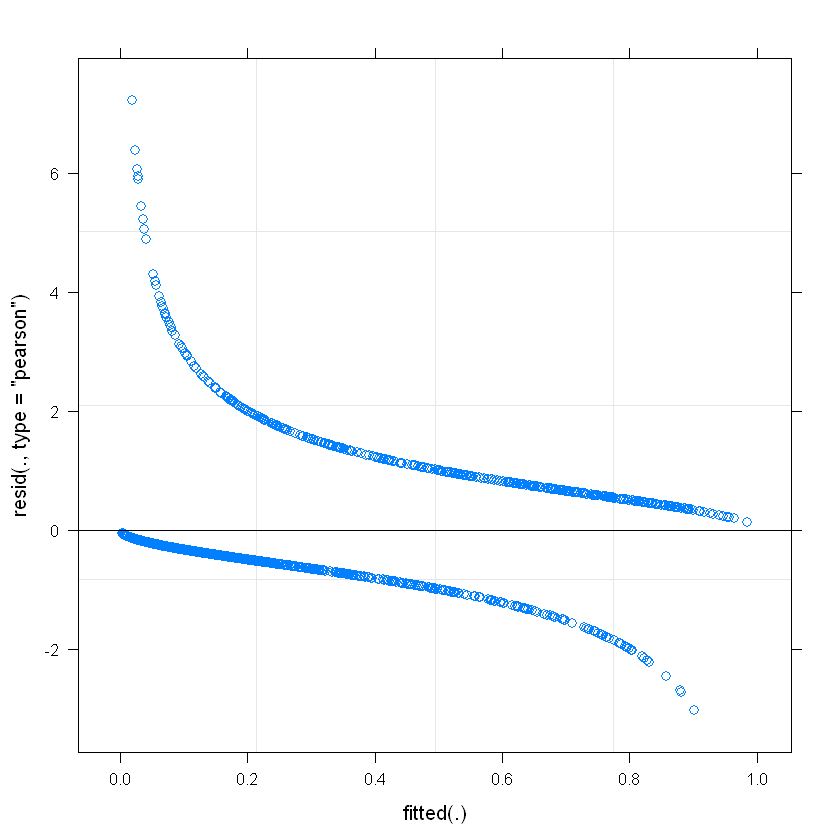

In [146]:
plot(model_re)

In [135]:
library(stargazer)



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [141]:
stargazer(model_re, summary=FALSE, title = 'Random effects model', align = TRUE, single.row=TRUE)



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Jul 24, 2021 - 8:24:57 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Random effects model} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & \multicolumn{1}{c}{intrastate\_conflict} \\ 
\hline \\[-1.8ex] 
 T1 & -2.662^{**}$ $(1.066) \\ 
  T2 & -0.295$ $(0.547) \\ 
  T3 & -0.134$ $(0.795) \\ 
  T4 & -0.720$ $(0.643) \\ 
  T5 & -1.128$ $(0.935) \\ 
  T6 & 3.096^{***}$ $(0.817) \\ 
  T7 & -2.018^{*}$ $(1.141) \\ 
  T8 & 0.229$ $(0.677) \\ 
  T9 & -0.922$ $(0.797) \\ 
  T10 & -1.342$ $(0.859) \\ 
  T11 & -0.088$ $(0.844) \\ 
  T12 & -1.105$ $(0.872) \\ 
  T13 & -0.654$ $(0.582) \\ 
  T14 & -0.489$ $(0.651) \\ 
  T15 & -0.138$ $(0.655) \\ 
  T16 & -0.836$ $(0.803) \\ 
  T17 & -0.745$ $(0.760) \

In [158]:
model_re2 <- glmer(
  intrastate_conflict ~ ForeignAid_log + Resources + EthFrac + LingFrac + RelFrac + Transitional + AC_neighbour + GDP_capita_log + Population_log + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23 + (1 + year | countryname),
  data = indices_df_c,
    family='binomial'
)

boundary (singular) fit: see ?isSingular



In [175]:
summary(model_re2)


Correlation matrix not shown by default, as p = 33 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: intrastate_conflict ~ ForeignAid_log + Resources + EthFrac +  
    LingFrac + RelFrac + Transitional + AC_neighbour + GDP_capita_log +  
    Population_log + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 +  
    T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 +  
    T19 + T20 + T21 + T22 + T23 + (1 + year | countryname)
   Data: indices_df_c

     AIC      BIC   logLik deviance df.resid 
  1003.9   1198.4   -466.0    931.9     1602 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9530 -0.2912 -0.1342 -0.0371  9.6058 

Random effects:
 Groups      Name        Variance  Std.Dev.  Corr
 countryname (Intercept) 1.190e+00 1.0908834     
             year        1.212e-07 0.0003482 1.00
Number of obs: 1638, groups:  countryname, 46

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -13.325110   4.100616  -3